In [129]:
# WeatherPy


## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [175]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
import os
import csv
from datetime import datetime


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [131]:
### Generate the Cities List by Using the `citipy` Library
datetime.utcfromtimestamp(1669821475).strftime('%d-%m-%Y %H:%M:%S')



'30-11-2022 15:17:55'

In [132]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=2000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 741


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [145]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%d-%m-%Y %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | laguna
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | sangar
Processing Record 4 of Set 1 | cukai
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | hasaki
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | okha
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | kromy
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | sur
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | airai
Processing Record 21 of Set 1 | san patricio
Processing Record 22 of Set 1 | ndele
Processing Record 23 of Set 1 | barrow
Processing Record 24 

Processing Record 38 of Set 4 | nuuk
Processing Record 39 of Set 4 | broome
Processing Record 40 of Set 4 | itoman
Processing Record 41 of Set 4 | kiama
Processing Record 42 of Set 4 | shihezi
Processing Record 43 of Set 4 | hofn
Processing Record 44 of Set 4 | chaochou
City not found. Skipping...
Processing Record 45 of Set 4 | chatrapur
Processing Record 46 of Set 4 | muros
Processing Record 47 of Set 4 | san cristobal
Processing Record 48 of Set 4 | baylo
Processing Record 49 of Set 4 | nome
Processing Record 0 of Set 5 | bethel
Processing Record 1 of Set 5 | codrington
Processing Record 2 of Set 5 | te anau
Processing Record 3 of Set 5 | xuddur
Processing Record 4 of Set 5 | buraydah
Processing Record 5 of Set 5 | dzhebariki-khaya
Processing Record 6 of Set 5 | nanga eboko
Processing Record 7 of Set 5 | puerto narino
Processing Record 8 of Set 5 | isla mujeres
Processing Record 9 of Set 5 | watertown
Processing Record 10 of Set 5 | arlit
Processing Record 11 of Set 5 | biltine
Proc

Processing Record 26 of Set 8 | caravelas
Processing Record 27 of Set 8 | bell ville
Processing Record 28 of Set 8 | maceio
Processing Record 29 of Set 8 | kerman
Processing Record 30 of Set 8 | san policarpo
Processing Record 31 of Set 8 | karratha
Processing Record 32 of Set 8 | henties bay
Processing Record 33 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 34 of Set 8 | mastic beach
Processing Record 35 of Set 8 | christchurch
Processing Record 36 of Set 8 | sao borja
Processing Record 37 of Set 8 | necochea
Processing Record 38 of Set 8 | hailar
Processing Record 39 of Set 8 | canto do buriti
Processing Record 40 of Set 8 | santa catalina
Processing Record 41 of Set 8 | haarby
City not found. Skipping...
Processing Record 42 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 43 of Set 8 | itaituba
Processing Record 44 of Set 8 | naze
Processing Record 45 of Set 8 | bognor regis
Processing Record 46 of Set 8 | homer
Processing Record 47 of 

Processing Record 18 of Set 12 | sironko
Processing Record 19 of Set 12 | mosquera
Processing Record 20 of Set 12 | kangasala
Processing Record 21 of Set 12 | fort nelson
Processing Record 22 of Set 12 | boffa
Processing Record 23 of Set 12 | pisco
Processing Record 24 of Set 12 | bacolod
Processing Record 25 of Set 12 | alofi
Processing Record 26 of Set 12 | marsa matruh
Processing Record 27 of Set 12 | grand gaube
Processing Record 28 of Set 12 | geraldton
Processing Record 29 of Set 12 | bud
Processing Record 30 of Set 12 | labuhan
Processing Record 31 of Set 12 | baykit
Processing Record 32 of Set 12 | jardim
Processing Record 33 of Set 12 | shakawe
Processing Record 34 of Set 12 | shambu
Processing Record 35 of Set 12 | gimbi
Processing Record 36 of Set 12 | kulevcha
Processing Record 37 of Set 12 | praia
Processing Record 38 of Set 12 | ozinki
Processing Record 39 of Set 12 | siverek
Processing Record 40 of Set 12 | rawah
Processing Record 41 of Set 12 | tilichiki
Processing Reco

In [146]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          675
Lat           675
Lng           675
Max Temp      675
Humidity      675
Cloudiness    675
Wind Speed    675
Country       675
Date          675
dtype: int64

In [147]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,laguna,38.4210,-121.4238,10.72,93,100,4.12,US,01-12-2022 23:17:18
1,hilo,19.7297,-155.0900,29.04,78,100,4.12,US,01-12-2022 23:17:18
2,sangar,63.9242,127.4739,-32.88,95,100,2.54,RU,01-12-2022 23:16:55
3,cukai,4.2500,103.4167,25.00,91,96,2.28,MY,01-12-2022 23:17:18
4,port elizabeth,-33.9180,25.5701,17.95,95,11,1.79,ZA,01-12-2022 23:13:21


In [148]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [149]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,laguna,38.4210,-121.4238,10.72,93,100,4.12,US,01-12-2022 23:17:18
1,hilo,19.7297,-155.0900,29.04,78,100,4.12,US,01-12-2022 23:17:18
2,sangar,63.9242,127.4739,-32.88,95,100,2.54,RU,01-12-2022 23:16:55
3,cukai,4.2500,103.4167,25.00,91,96,2.28,MY,01-12-2022 23:17:18
4,port elizabeth,-33.9180,25.5701,17.95,95,11,1.79,ZA,01-12-2022 23:13:21


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

The plot shows that as we move away from the equator, temperature drops


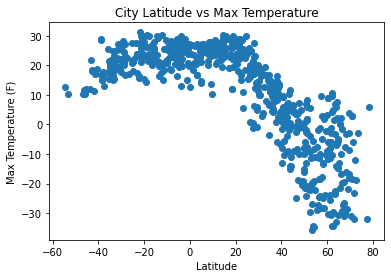

In [150]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Max Temp"]).astype(float))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature")
print("The plot shows that as we move away from the equator, temperature drops")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

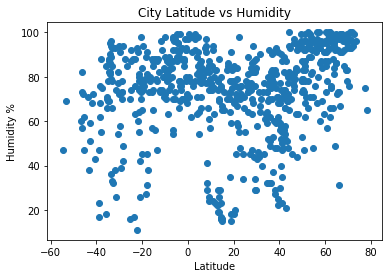

In [151]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Humidity"]).astype(float))
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f"City Latitude vs Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

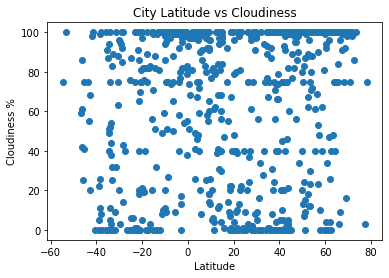

In [152]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Cloudiness"]).astype(float))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title(f"City Latitude vs Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

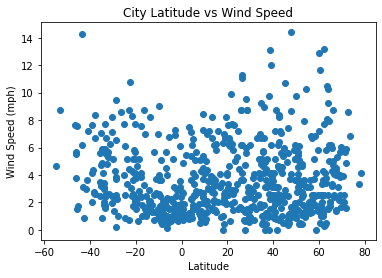

In [153]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Wind Speed"]).astype(float))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [154]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,laguna,38.4210,-121.4238,10.72,93,100,4.12,US,01-12-2022 23:17:18
1,hilo,19.7297,-155.0900,29.04,78,100,4.12,US,01-12-2022 23:17:18
2,sangar,63.9242,127.4739,-32.88,95,100,2.54,RU,01-12-2022 23:16:55
3,cukai,4.2500,103.4167,25.00,91,96,2.28,MY,01-12-2022 23:17:18
5,hasaki,35.7333,140.8333,9.56,78,100,5.78,JP,01-12-2022 23:17:18


In [155]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,port elizabeth,-33.9180,25.5701,17.95,95,11,1.79,ZA,01-12-2022 23:13:21
6,carnarvon,-24.8667,113.6333,21.13,74,0,6.10,AU,01-12-2022 23:17:18
7,busselton,-33.6500,115.3333,15.08,79,3,2.37,AU,01-12-2022 23:17:19
9,saint-philippe,-21.3585,55.7679,22.77,80,18,1.71,RE,01-12-2022 23:17:19
15,mataura,-46.1927,168.8643,10.27,82,61,3.77,NZ,01-12-2022 23:17:20


The r-value is: 0.7027740107448389


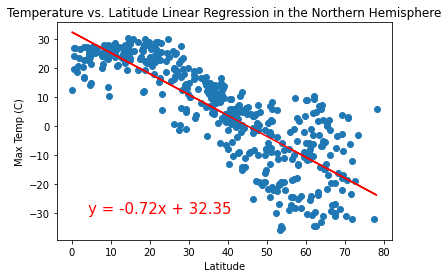

In [167]:
# Define a function to create Linear Regression plots
# Max Temp vs Latitude Linear regression on Northern Hemisphere

x_values = pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemi_df["Max Temp"]).astype(float)
    
def plot_linear_regression(x_values, y_values, text_coordinates):
    text_coordinates = 4,-30
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp (C)")
    plt.title("Temperature vs. Latitude Linear Regression in the Northern Hemisphere")
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    
plot_linear_regression(x_values, y_values, "Max Temp")

The r-value is: 0.29535767514608996


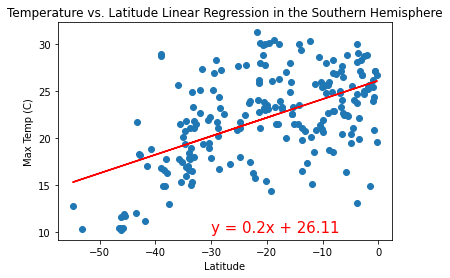

<Figure size 720x720 with 0 Axes>

In [168]:
# Max Temp Vs Latitiude Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemi_df["Max Temp"]).astype(float)
    
def plot_linear_regression(x_values, y_values, text_coordinates):
    text_coordinates = -30,10
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp (C)")
    plt.title("Temperature vs. Latitude Linear Regression in the Southern Hemisphere")
    print(f"The r-value is: {rvalue**2}")
    plt.figure(figsize=(10,10))
    plt.show()
    
plot_linear_regression(x_values, y_values, "Max Temp")

The r-value is: 0.1054996307559893


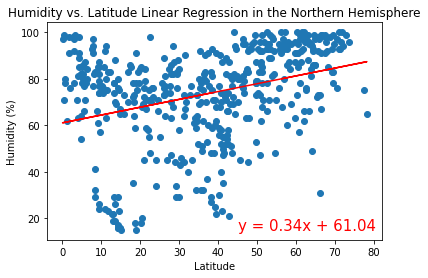

In [169]:
# Linear regression on Northern Hemisphere - Humidity Vs Latitiude

x_values = pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemi_df["Humidity"]).astype(float)
    
def plot_linear_regression(x_values, y_values, text_coordinates):
    text_coordinates = 45,15
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity (%)")
    plt.title("Humidity vs. Latitude Linear Regression in the Northern Hemisphere")
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    
plot_linear_regression(x_values, y_values, "Humidity")

The r-value is: 0.12722569443529447


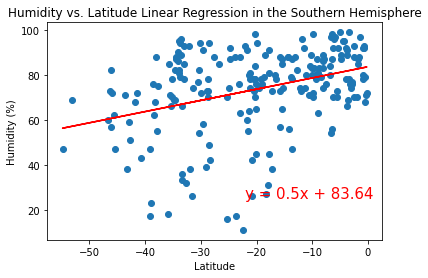

In [170]:
# Linear regression on Southern Hemisphere - Humidity Vs Latitiude

x_values = pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemi_df["Humidity"]).astype(float)
    
def plot_linear_regression(x_values, y_values, text_coordinates):
    text_coordinates = -22,25
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity (%)")
    plt.title("Humidity vs. Latitude Linear Regression in the Southern Hemisphere")
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    
plot_linear_regression(x_values, y_values, "Humidity")

The r-value is: 0.028919418867822788


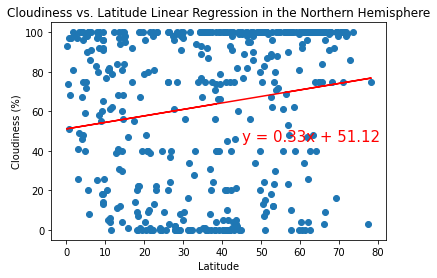

In [171]:
# Cloudiness vs. Latitude Linear Regression Plot on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemi_df["Cloudiness"]).astype(float)
    
def plot_linear_regression(x_values, y_values, text_coordinates):
    text_coordinates = 45,45
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness (%)")
    plt.title("Cloudiness vs. Latitude Linear Regression in the Northern Hemisphere")
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    
plot_linear_regression(x_values, y_values, "Cloudiness")

The r-value is: 0.08788212543503549


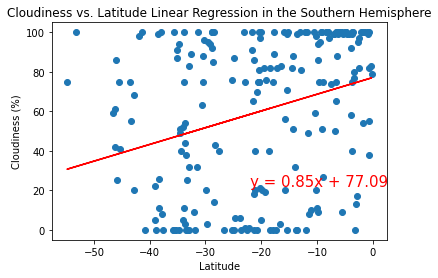

In [172]:
# Humidity vs. Latitude Linear Regression Plot on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemi_df["Cloudiness"]).astype(float)
    
def plot_linear_regression(x_values, y_values, text_coordinates):
    text_coordinates = -22,22
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness (%)")
    plt.title("Cloudiness vs. Latitude Linear Regression in the Southern Hemisphere")
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    
plot_linear_regression(x_values, y_values, "Cloudiness")


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.004215428308481114


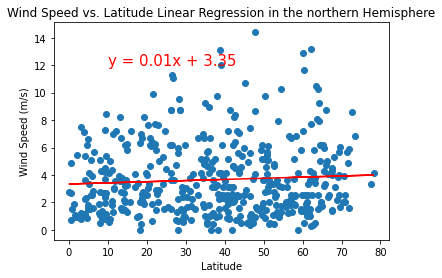

In [173]:
# Northern Hemisphere Wind Speed vs. Latitude Linear Regression Plot
x_values = pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemi_df["Wind Speed"]).astype(float)
    
def plot_linear_regression(x_values, y_values, text_coordinates):
    text_coordinates = 10,12
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed (m/s)")
    plt.title("Wind Speed vs. Latitude Linear Regression in the northern Hemisphere")
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    
plot_linear_regression(x_values, y_values, "Wind Speed")



The r-value is: 0.15184687189932938


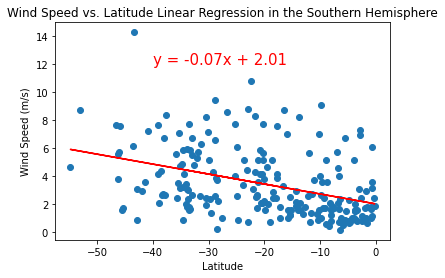

In [174]:
# Southern Hemisphere Wind Speed vs. Latitude Linear Regression Plot
x_values = pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemi_df["Wind Speed"]).astype(float)
    
def plot_linear_regression(x_values, y_values, text_coordinates):
    text_coordinates = -40,12
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed (m/s)")
    plt.title("Wind Speed vs. Latitude Linear Regression in the Southern Hemisphere")
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    
plot_linear_regression(x_values, y_values, "Wind Speed")